In [3]:
# CH02

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib.request as req
import tarfile
from sklearn.model_selection import train_test_split

In [5]:
DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/rickiepark/handson-ml2/master/'
HOUSING_PATH = os.path.join('Data')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

In [6]:
# 자동 다운로드
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    req.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(housing_path)
    housing_tgz.close()

In [7]:
fetch_housing_data()

In [8]:
# 판다스로 열기
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [9]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


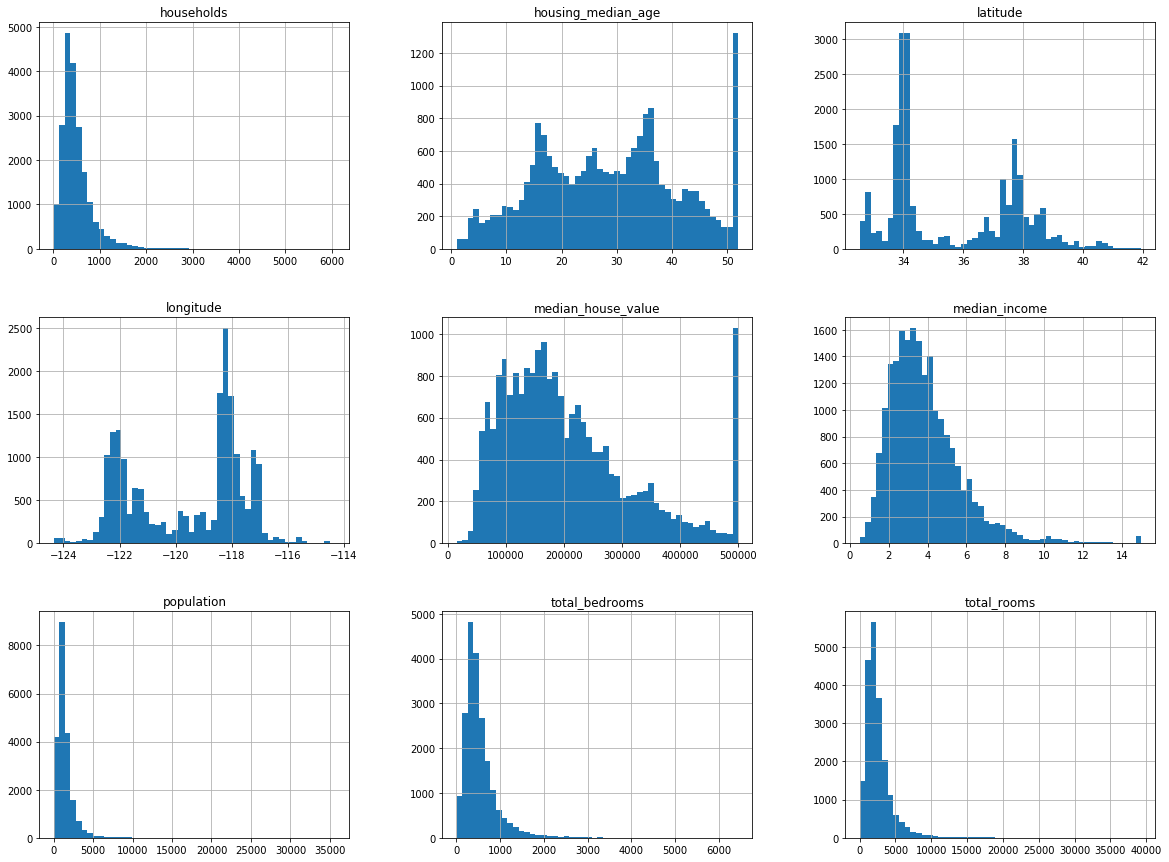

In [13]:
# bins = 구간을 나눌 때
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [15]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [16]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


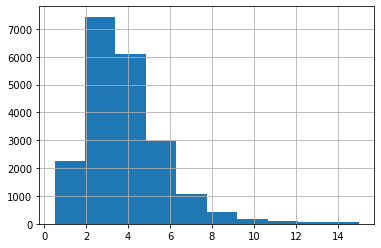

In [17]:
housing['median_income'].hist()

In [18]:
# bins = 범주, cut 함수를 통해 고르게 나누게해줌

housing['income_cat'] = pd.cut(housing['median_income'], bins=[0.,1.5,3.0,4.5,6.0,np.inf], labels = [1,2,3,4,5])

In [19]:
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

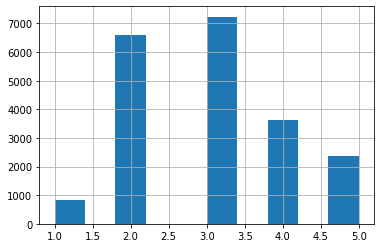

In [20]:
housing['income_cat'].hist()

In [22]:
#  균등하게 나눠줌 (위에  cut함수)
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    start_train_set = housing.loc[train_index]
    start_test_set = housing.loc[test_index]

In [26]:
start_train_set['income_cat'].value_counts() / len(start_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [27]:
start_test_set['income_cat'].value_counts() / len(start_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [29]:
# stratify 계층적으로 샘플링할때 비율을 유지해줌
st_train_set , st_test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing['income_cat'])

In [31]:
st_train_set['income_cat'].value_counts() / len(st_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [32]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts() / len(data)

In [35]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    'Overall' : income_cat_proportions(housing),
    'Stratified' : income_cat_proportions(start_train_set),
    'Random' : income_cat_proportions(test_set),
    }).sort_index()

compare_props['Rand. %error'] = 100 * compare_props['Random'] / compare_props['Overall'] - 100
compare_props['Start. %error'] = 100 * compare_props['Stratified'] / compare_props['Overall'] - 100

In [36]:
compare_props

,Overall,Stratified,Random,Rand. %error,Start. %error
1,0.039826,0.039850,0.040213,0.973236,0.060827
2,0.318847,0.318859,0.324370,1.732260,0.003799
3,0.350581,0.350594,0.358527,2.266446,0.003455
4,0.176308,0.176296,0.167393,-5.056334,-0.006870
5,0.114438,0.114402,0.109496,-4.318374,-0.031753


In [37]:
for set_ in (start_train_set, start_test_set):
    set_.drop('income_cat', axis =1, inplace=True)

In [38]:
housing = start_test_set.copy()

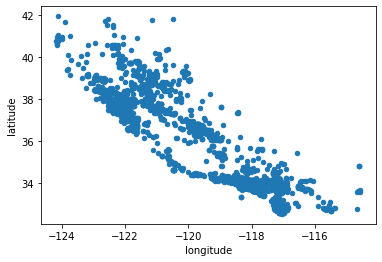

In [41]:
# housing.plot(kind='scatter', x='longitude', y='latitude')
# 동일한 기능을 함.
housing.plot.scatter(x='longitude', y='latitude')
plt.savefig('bad_visualization_plot')

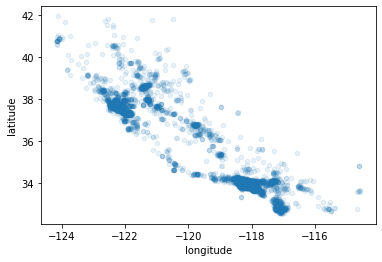

In [42]:

housing.plot.scatter(x='longitude', y='latitude', alpha=0.1)
plt.savefig('bad_visualization_plot')

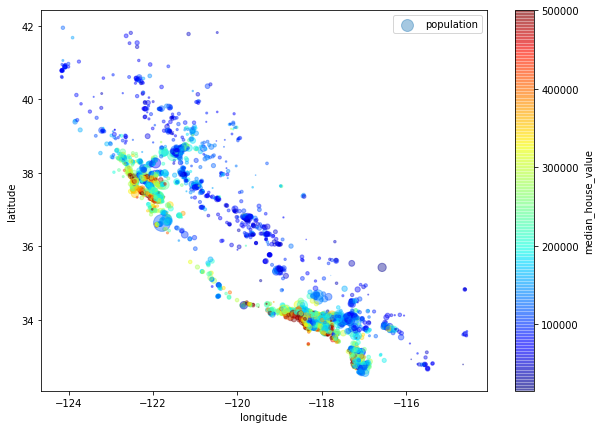

In [43]:
# s = 인구수 비례 c = color , cmap = color map
housing.plot.scatter(x='longitude', y='latitude', alpha=0.4, s=housing['population'] / 100, label='population',
                     figsize=(10, 7), c = 'median_house_value', cmap=plt.get_cmap('jet'), colorbar=True, sharex=False)

plt.savefig('housing_prices,scatterplot')